x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


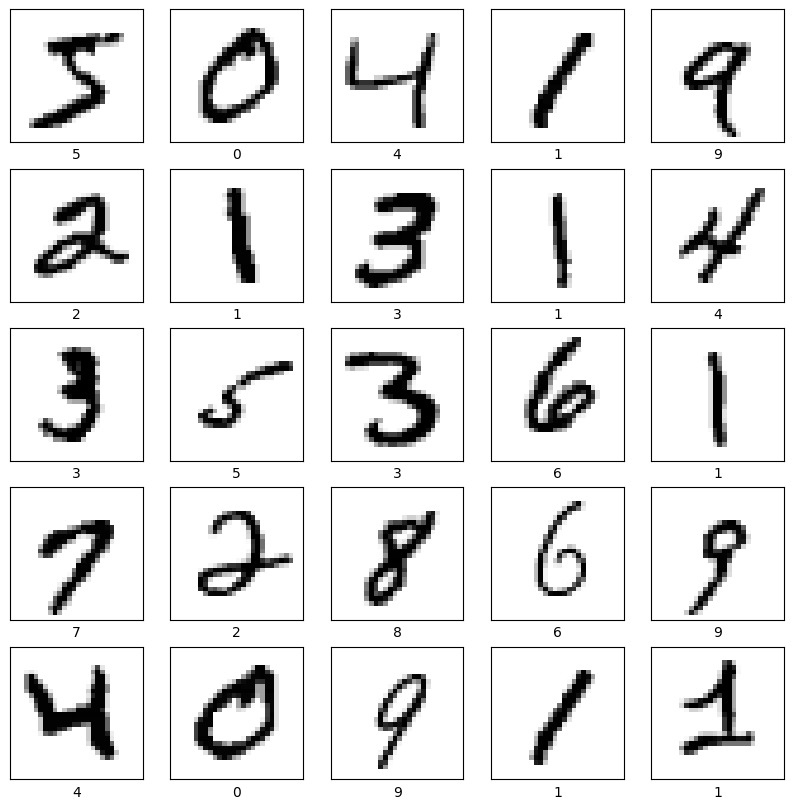

In [2]:
import numpy as np
import keras

# Model / data parameters
num_classes = 10

# Load the data and split it between train and test sets
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_mnist_train = x_mnist_train.astype("float32") / 255
x_mnist_test = x_mnist_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_mnist_train = np.expand_dims(x_mnist_train, -1)
x_mnist_test = np.expand_dims(x_mnist_test, -1)
print("x_train shape:", x_mnist_train.shape)
print(x_mnist_train.shape[0], "train samples")
print(x_mnist_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_mnist_train = keras.utils.to_categorical(y_mnist_train, num_classes) #i.e. from 4 to [0,0,0,0,1,0,0,0,0,0]
y_mnist_test = keras.utils.to_categorical(y_mnist_test, num_classes)

# show some data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_mnist_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(y_mnist_train[i]))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Creating visualization for model: sequential
Processing input layer...
Processing layer 0: Conv2D
Processing layer 1: MaxPooling2D
Processing layer 2: Conv2D
Processing layer 3: MaxPooling2D
Processing layer 4: Flatten
Processing layer 5: Dropout
Processing layer 6: Dense
Visualization saved as 'tmp/generic-mnist-cnn-model.png'


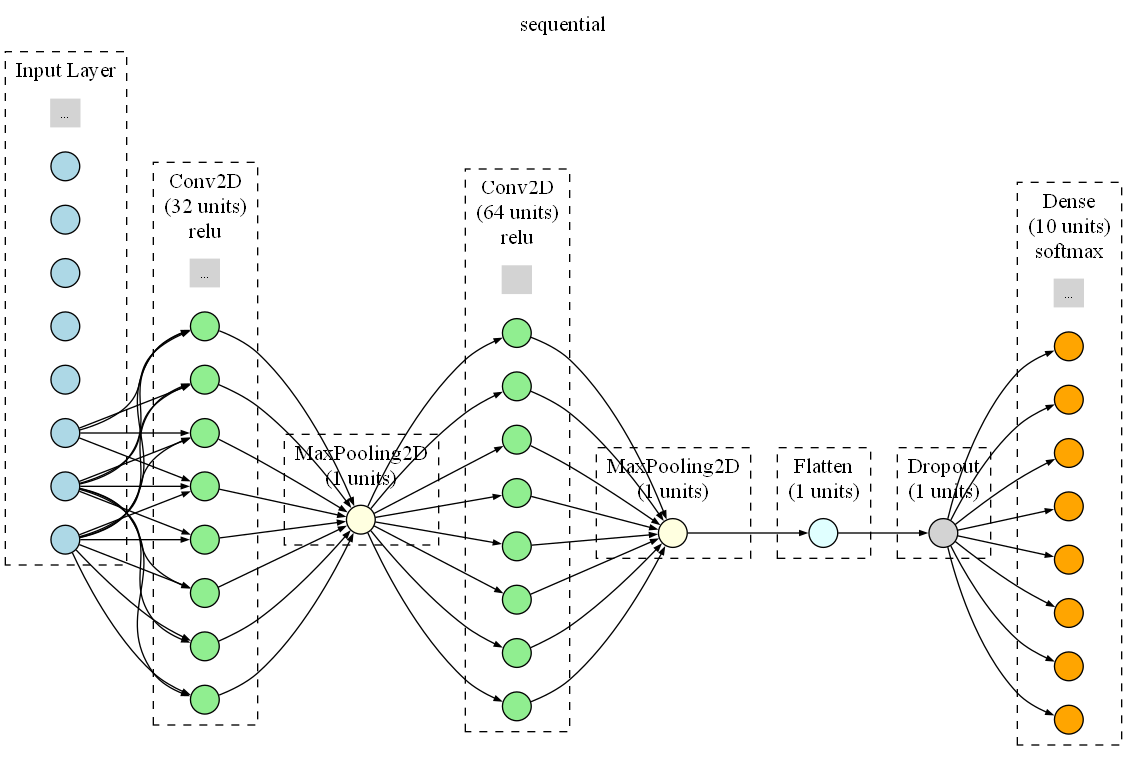

In [3]:
import keras
from utils import display_nn_graph
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
display_nn_graph(model, filename='tmp/generic-mnist-cnn-model')

In [4]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_mnist_train, y_mnist_train, epochs=3, validation_split=0.2, verbose=1)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9266 - loss: 0.2362 - val_accuracy: 0.9745 - val_loss: 0.0859
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9723 - loss: 0.0893 - val_accuracy: 0.9841 - val_loss: 0.0531
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9785 - loss: 0.0710 - val_accuracy: 0.9877 - val_loss: 0.0461


loss: 0.041022755205631256, accuracy: 0.9868999719619751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


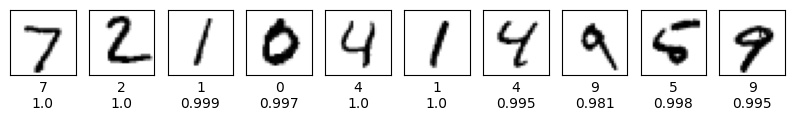

In [5]:
score = model.evaluate(x_mnist_test, y_mnist_test, verbose=0)
print(f"loss: {score[0]}, accuracy: {score[1]}")

#plot the first n test images and their predicted labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_mnist_test[i].reshape(28,28), cmap=plt.cm.binary)
    _preds = model.predict(x_mnist_test[i:i+1])[0]
    #print(f"Image {i} predictions: {_preds.round(3)}")
    plt.xlabel(f"{np.argmax(_preds)}\n{np.max(_preds).round(3).astype(str)}")
plt.show()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


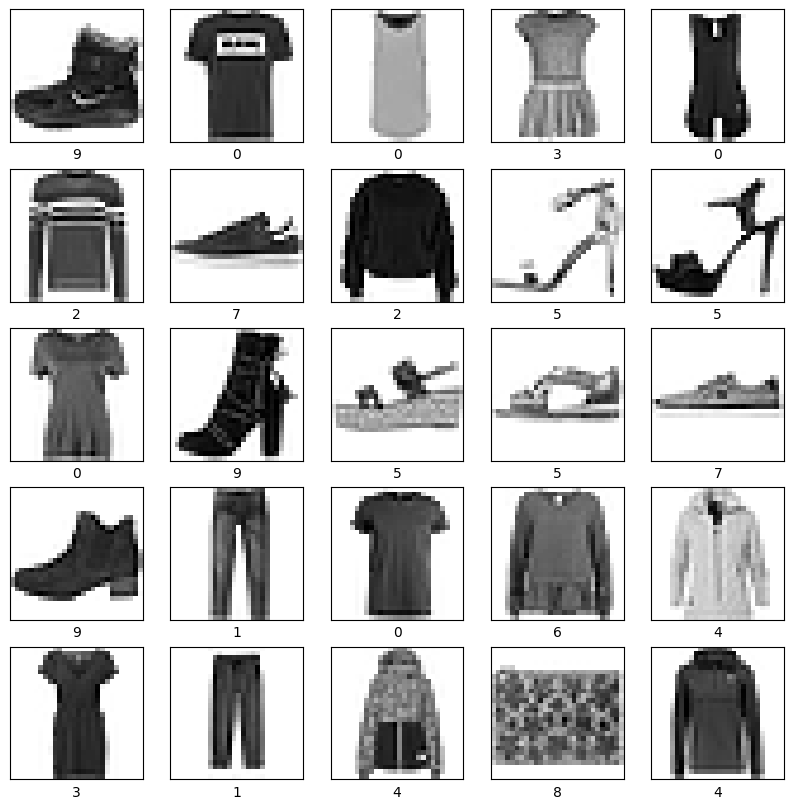

In [6]:
import numpy as np
import keras

# Model / data parameters
num_classes = 10

# Load the data and split it between train and test sets
(x_fashion_mnist_train, y_fashion_mnist_train), (x_fashion_mnist_test, y_fashion_mnist_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_fashion_mnist_train = x_fashion_mnist_train.astype("float32") / 255
x_fashion_mnist_test = x_fashion_mnist_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_fashion_mnist_train = np.expand_dims(x_fashion_mnist_train, -1)
x_fashion_mnist_test = np.expand_dims(x_fashion_mnist_test, -1)
print("x_train shape:", x_fashion_mnist_train.shape)
print(x_fashion_mnist_train.shape[0], "train samples")
print(x_fashion_mnist_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_fashion_mnist_train = keras.utils.to_categorical(y_fashion_mnist_train, num_classes) 
y_fashion_mnist_test = keras.utils.to_categorical(y_fashion_mnist_test, num_classes)

# show some data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_fashion_mnist_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(y_fashion_mnist_train[i]))

In [7]:
# reuse the same model
model_fashion = model
model_fashion.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_fashion.fit(x_fashion_mnist_train, y_fashion_mnist_train, epochs=5, validation_split=0.3, verbose=1)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7719 - loss: 0.6457 - val_accuracy: 0.8524 - val_loss: 0.4071
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8465 - loss: 0.4265 - val_accuracy: 0.8739 - val_loss: 0.3544
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8641 - loss: 0.3762 - val_accuracy: 0.8819 - val_loss: 0.3289
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.8715 - loss: 0.3527 - val_accuracy: 0.8881 - val_loss: 0.3102
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8776 - loss: 0.3332 - val_accuracy: 0.8891 - val_loss: 0.3061


loss: 0.32167762517929077, accuracy: 0.8858000040054321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Image 0 predictions: [0.    0.    0.    0.    0.    0.002 0.    0.013 0.    0.984]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image 1 predictions: [0.001 0.    0.981 0.    0.011 0.    0.007 0.    0.    0.   ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 2 predictions: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image 3 predictions: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image 4 predictions: [0.107 0.    0.017 0.005 0.14  0.    0.732 0.    0.    0.   ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image 5 predictions: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image 6 predictions: [0.004 0.001 0.162 0.    0.459 0.    0.375 0.    0.    0.   ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image 7 predictions: [0.009 0.    0.011 0.004 0.204 0.    0.765 0.    0.006 0.   ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image 8 predictions: [0.    

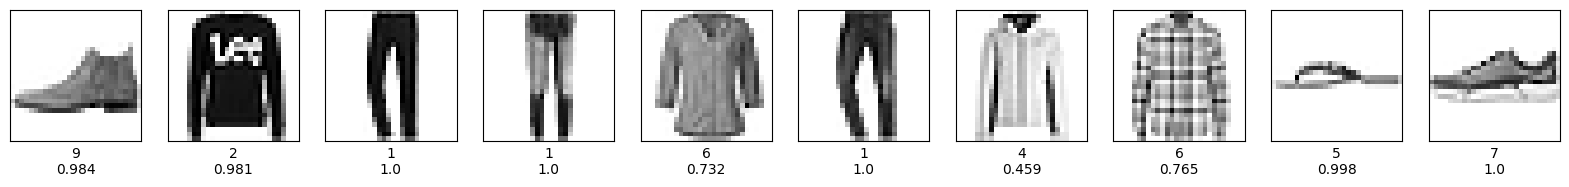

In [8]:
score = model_fashion.evaluate(x_fashion_mnist_test, y_fashion_mnist_test, verbose=0)
print(f"loss: {score[0]}, accuracy: {score[1]}")

#plot the first n test images and their predicted labels
plt.figure(figsize=(20,30))
for i in range(10):    
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_fashion_mnist_test[i].reshape(28,28), cmap=plt.cm.binary)
    _preds = model_fashion.predict(x_fashion_mnist_test[i:i+1])[0]
    print(f"Image {i} predictions: {_preds.round(3)}")
    plt.xlabel(f"{np.argmax(_preds)}\n{np.max(_preds).round(3).astype(str)}")
plt.show()
